In [22]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2 
import random
from math import log

from tqdm import tqdm

In [2]:
import numpy

def upshift(a,index,n):
    col = []
    for j in range(len(a)):
        col.append(a[j][index])
    shiftCol = numpy.roll(col,-n)
    for i in range(len(a)):
        for j in range(len(a[0])):
            if(j==index):
                a[i][j] = shiftCol[i]

def downshift(a,index,n):
    col = []
    for j in range(len(a)):
        col.append(a[j][index])
    shiftCol = numpy.roll(col,n)
    for i in range(len(a)):
        for j in range(len(a[0])):
            if(j==index):
                a[i][j] = shiftCol[i]

def rotate180(n):
    bits = "{0:b}".format(n)
    return int(bits[::-1], 2)


In [4]:
from PIL import Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('input/pic2.png')
pix = im.load()

#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

# Vectors Kr and Kc
alpha = 8
Kr = [randint(0,pow(2,alpha)-1) for i in range(m)]
Kc = [randint(0,pow(2,alpha)-1) for i in range(n)]
ITER_MAX = 1

print('Vector Kr : ', Kr)
print('Vector Kc : ', Kc)

f = open('keys.txt','w+')
f.write('Vector Kr : \n')
for a in Kr:
	f.write(str(a) + '\n')
f.write('Vector Kc : \n')
for a in Kc:
	f.write(str(a) + '\n')
f.write('ITER_MAX : \n')
f.write(str(ITER_MAX) + '\n')


for iterations in range(ITER_MAX):
	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],Kr[i])
		else:
			r[i] = numpy.roll(r[i],-Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],Kr[i])
		else:
			g[i] = numpy.roll(g[i],-Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],Kr[i])
		else:
			b[i] = numpy.roll(b[i],-Kr[i])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			upshift(r,i,Kc[i])
		else:
			downshift(r,i,Kc[i])
		if(gModulus==0):
			upshift(g,i,Kc[i])
		else:
			downshift(g,i,Kc[i])
		if(bModulus==0):
			upshift(b,i,Kc[i])
		else:
			downshift(b,i,Kc[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])


for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

im.save('encrypted_images/pic2.png')





Vector Kr :  [4, 202, 149, 21, 234, 104, 139, 70, 51, 155, 5, 97, 16, 66, 197, 143, 162, 168, 62, 74, 125, 38, 162, 92, 50, 130, 118, 179, 87, 124, 28, 234, 0, 221, 7, 26, 163, 42, 156, 222, 13, 0, 252, 2, 114, 176, 128, 78, 187, 32, 60, 154, 239, 159, 235, 231, 161, 165, 116, 218, 186, 170, 100, 173, 233, 17, 95, 70, 11, 1, 160, 222, 192, 17, 235, 229, 93, 174, 102, 61, 91, 143, 42, 228, 0, 77, 129, 216, 169, 4, 98, 3, 135, 199, 39, 135, 101, 112, 144, 62, 136, 196, 62, 127, 178, 142, 169, 96, 36, 40, 178, 125, 131, 196, 171, 99, 43, 225, 200, 177, 85, 206, 188, 118, 35, 88, 205, 77, 72, 216, 122, 13, 13, 96, 163, 246, 153, 240, 179, 107, 190, 201, 200, 164, 173, 117, 100, 255, 190, 164, 133, 7, 250, 38, 120, 7, 172, 79, 207, 49, 194, 46, 239, 172, 128, 192, 131, 18, 206, 56, 9, 142, 219, 54, 77, 50, 176, 156, 140, 152, 59, 89, 139, 21, 25, 19, 174, 200, 95, 128, 137, 74, 105, 145, 195, 132, 136, 125, 151, 45, 98, 21, 4, 140, 116, 113, 213, 163, 74, 125, 80, 42, 97, 111, 233, 3, 18, 1

In [5]:
from PIL import  Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('encrypted_images/pic2.png')
pix = im.load()


#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

Kr = []
Kc = []

print('Enter value of Kr')

Kr = list(map(int, input().split(', ')))

print('Enter value of Kc')

Kc = list(map(int, input().split(',')))

print('Enter value of ITER_MAX')
ITER_MAX = int(input())


for iterations in range(ITER_MAX):
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			downshift(r,i,Kc[i])
		else:
			upshift(r,i,Kc[i])
		if(gModulus==0):
			downshift(g,i,Kc[i])
		else:
			upshift(g,i,Kc[i])
		if(bModulus==0):
			downshift(b,i,Kc[i])
		else:
			upshift(b,i,Kc[i])

	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],-Kr[i])
		else:
			r[i] = numpy.roll(r[i],Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],-Kr[i])
		else:
			g[i] = numpy.roll(g[i],Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],-Kr[i])
		else:
			b[i] = numpy.roll(b[i],Kr[i])

for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

im.save('decrypted_images/pic2.png')





Enter value of Kr
4, 202, 149, 21, 234, 104, 139, 70, 51, 155, 5, 97, 16, 66, 197, 143, 162, 168, 62, 74, 125, 38, 162, 92, 50, 130, 118, 179, 87, 124, 28, 234, 0, 221, 7, 26, 163, 42, 156, 222, 13, 0, 252, 2, 114, 176, 128, 78, 187, 32, 60, 154, 239, 159, 235, 231, 161, 165, 116, 218, 186, 170, 100, 173, 233, 17, 95, 70, 11, 1, 160, 222, 192, 17, 235, 229, 93, 174, 102, 61, 91, 143, 42, 228, 0, 77, 129, 216, 169, 4, 98, 3, 135, 199, 39, 135, 101, 112, 144, 62, 136, 196, 62, 127, 178, 142, 169, 96, 36, 40, 178, 125, 131, 196, 171, 99, 43, 225, 200, 177, 85, 206, 188, 118, 35, 88, 205, 77, 72, 216, 122, 13, 13, 96, 163, 246, 153, 240, 179, 107, 190, 201, 200, 164, 173, 117, 100, 255, 190, 164, 133, 7, 250, 38, 120, 7, 172, 79, 207, 49, 194, 46, 239, 172, 128, 192, 131, 18, 206, 56, 9, 142, 219, 54, 77, 50, 176, 156, 140, 152, 59, 89, 139, 21, 25, 19, 174, 200, 95, 128, 137, 74, 105, 145, 195, 132, 136, 125, 151, 45, 98, 21, 4, 140, 116, 113, 213, 163, 74, 125, 80, 42, 97, 111, 233, 3, 1

# VISUAL TESTING


npcrv and uaci

In [13]:
from PIL import Image
import numpy as np

"""
    This method compares two image.If the pixel value is same then 0 is stored in the matrix else one is stored
"""
def rateofchange(height,width,pixel1,pixel2,matrix,i):

    for y in range(0,height):
        for x in range(0,width):
            #print(x,y)
            if pixel1[x,y][i] == pixel2[x,y][i]:
                matrix[x,y]=0
            else:
                matrix[x,y]=1
    return matrix
"""
    sum of the values of 1 stored in matrix is calculated
"""
def sumofpixel(height,width,pixel1,pixel2,ematrix,i):
    matrix=rateofchange(height,width,pixel1,pixel2,ematrix,i)
    psum=0
    for y in range(0,height):
        for x in range(0,width):
            psum=matrix[x,y]+psum
    return psum

"""
Finally the above two module is called to calculate the values
"""
def npcrv(loc1,loc2):
    c1 = Image.open(loc1)
    c2 = Image.open(loc2)
    width, height = c1.size
    pixel1 = c1.load()
    pixel2 = c2.load()
    ematrix = np.empty([width, height])
    per=(((sumofpixel(height,width,pixel1,pixel2,ematrix,0)/(height*width))*100)+((sumofpixel(height,width,pixel1,pixel2,ematrix,1)/(height*width))*100)+((sumofpixel(height,width,pixel1,pixel2,ematrix,2)/(height*width))*100))/3
    return per

In [14]:
print(npcrv("input/pic2.png","encrypted_images/pic2.png"))

99.55886243386243


In [8]:
from PIL import Image
import math
# Sama as NPCR both are used for sensitivity analysis two encrypted image is required

"""
Unified average avereage inensity changed rate
this code calculates average intensity change rate of pixels
"""
def uaci(loc1,loc2):
    image1 = Image.open(loc1)
    image2 = Image.open(loc2)
    pixel1=image1.load()
    pixel2=image2.load()
    width,height=image1.size
    value=0.0
    for y in range(0,height):
        for x in range(0,width):
            value=(abs(pixel1[x,y][0]-pixel2[x,y][0])/255)+value

    value=(value/(width*height))*100
    return value

#print(uaci("encrypted16.png","encrypted116.png"))


In [9]:
print(uaci("input/pic2.png","encrypted_images/pic2.png"))

32.8305399937819


# SECURITY ANALYSIS

## Key Sensibility

## Key sensibility for image encryption using the proposed algorithm.

### Number of pixel change rate (NPCR) between images encrypted with keys K 1 and K 2 (with 1 bit difference).


Encryption using key k1(kr,kc,itr) in round1


In [8]:
from PIL import Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('input/pic1.png')
pix = im.load()

#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

# Vectors Kr and Kc
alpha = 8
Kr = [randint(0,pow(2,alpha)-1) for i in range(m)]
Kc = [randint(0,pow(2,alpha)-1) for i in range(n)]
ITER_MAX = 2

print('Vector Kr : ', Kr)
print('Vector Kc : ', Kc)

f = open('keys.txt','w+')
f.write('Vector Kr : \n')
for a in Kr:
	f.write(str(a) + '\n')
f.write('Vector Kc : \n')
for a in Kc:
	f.write(str(a) + '\n')
f.write('ITER_MAX : \n')
f.write(str(ITER_MAX) + '\n')


for iterations in range(ITER_MAX):
	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],Kr[i])
		else:
			r[i] = numpy.roll(r[i],-Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],Kr[i])
		else:
			g[i] = numpy.roll(g[i],-Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],Kr[i])
		else:
			b[i] = numpy.roll(b[i],-Kr[i])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			upshift(r,i,Kc[i])
		else:
			downshift(r,i,Kc[i])
		if(gModulus==0):
			upshift(g,i,Kc[i])
		else:
			downshift(g,i,Kc[i])
		if(bModulus==0):
			upshift(b,i,Kc[i])
		else:
			downshift(b,i,Kc[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])


for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

im.save('encrypted_images/pic1_using_k1.png')





Vector Kr :  [212, 237, 111, 250, 169, 150, 246, 223, 102, 91, 220, 234, 97, 213, 7, 140, 187, 199, 81, 99, 119, 232, 19, 97, 117, 158, 157, 147, 82, 112, 124, 13, 135, 254, 25, 6, 201, 221, 40, 116, 233, 48, 212, 18, 123, 36, 178, 27, 210, 62, 71, 26, 149, 69, 21, 64, 85, 53, 21, 232, 205, 245, 227, 105, 77, 113, 251, 202, 129, 186, 34, 74, 225, 211, 143, 124, 103, 153, 174, 26, 194, 152, 14, 68, 54, 154, 56, 74, 149, 237, 217, 66, 116, 104, 67, 249, 7, 232, 79, 208, 255, 128, 101, 224, 228, 44, 49, 218, 249, 187, 123, 193, 12, 12, 38, 149, 22, 36, 39, 137, 72, 90, 130, 134, 39, 231, 46, 106, 244, 124, 45, 249, 220, 243, 179, 76, 26, 239, 33, 13, 64, 57, 174, 245, 62, 30, 144, 67, 209, 200, 123, 234, 37, 80, 220, 184, 130, 107, 237, 171, 70, 255, 200, 252, 116, 36, 49, 192, 241, 64, 49, 62, 174, 117, 115, 122, 191, 204, 203, 225, 66, 148, 72, 65, 248, 125, 244, 30, 33, 166, 220, 114, 219, 120, 237, 240, 229, 93, 253, 251, 135, 74, 80, 9, 105, 98, 248, 96, 38, 178, 186, 93, 96, 106, 18

In [9]:
from PIL import Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('input/pic1.png')
pix = im.load()

#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

# Vectors Kr and Kc
alpha = 8
Kr = [randint(0,pow(2,alpha)-1) for i in range(m)]
Kc = [randint(0,pow(2,alpha)-1) for i in range(n)]
ITER_MAX = 2

print('Vector Kr : ', Kr)
print('Vector Kc : ', Kc)

f = open('keys.txt','w+')
f.write('Vector Kr : \n')
for a in Kr:
	f.write(str(a) + '\n')
f.write('Vector Kc : \n')
for a in Kc:
	f.write(str(a) + '\n')
f.write('ITER_MAX : \n')
f.write(str(ITER_MAX) + '\n')


for iterations in range(ITER_MAX):
	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],Kr[i])
		else:
			r[i] = numpy.roll(r[i],-Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],Kr[i])
		else:
			g[i] = numpy.roll(g[i],-Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],Kr[i])
		else:
			b[i] = numpy.roll(b[i],-Kr[i])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			upshift(r,i,Kc[i])
		else:
			downshift(r,i,Kc[i])
		if(gModulus==0):
			upshift(g,i,Kc[i])
		else:
			downshift(g,i,Kc[i])
		if(bModulus==0):
			upshift(b,i,Kc[i])
		else:
			downshift(b,i,Kc[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])


for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

im.save('encrypted_images/pic1_using_k2(with_one_diff_from_k1).png')





Vector Kr :  [190, 248, 8, 19, 178, 247, 163, 166, 160, 162, 206, 212, 219, 203, 146, 42, 170, 168, 65, 243, 173, 135, 247, 33, 215, 250, 39, 17, 24, 230, 16, 78, 54, 120, 222, 85, 35, 231, 134, 241, 109, 176, 162, 169, 253, 55, 174, 69, 89, 13, 12, 177, 151, 194, 57, 26, 245, 95, 243, 188, 133, 189, 7, 86, 57, 234, 0, 212, 252, 237, 74, 135, 158, 63, 2, 194, 113, 102, 3, 136, 249, 130, 239, 179, 156, 88, 75, 196, 183, 121, 164, 157, 107, 239, 6, 96, 253, 18, 33, 149, 133, 159, 198, 81, 190, 206, 173, 169, 20, 136, 150, 218, 187, 44, 191, 143, 188, 164, 45, 63, 135, 158, 214, 163, 110, 141, 216, 193, 216, 141, 127, 251, 114, 223, 104, 210, 15, 189, 225, 66, 115, 67, 255, 27, 205, 16, 140, 221, 203, 157, 61, 69, 182, 219, 233, 238, 25, 86, 51, 110, 185, 223, 116, 89, 38, 37, 185, 215, 107, 62, 94, 195, 177, 1, 163, 38, 131, 63, 61, 50, 97, 168, 119, 151, 216, 147, 201, 37, 86, 110, 236, 237, 26, 179, 106, 249, 159, 142, 181, 216, 209, 87, 241, 111, 250, 229, 254, 115, 220, 252, 29, 68, 

In [15]:
print(npcrv("encrypted_images/pic1_using_k1.png","encrypted_images/pic1_using_k2(with_one_diff_from_k1).png"))

99.62706375749855


encrypting pic1 using k1 in round2

In [10]:
from PIL import Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('input/pic1.png')
pix = im.load()

#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

# Vectors Kr and Kc
alpha = 8
Kr = [randint(0,pow(2,alpha)-1) for i in range(m)]
Kc = [randint(0,pow(2,alpha)-1) for i in range(n)]
ITER_MAX = 2

print('Vector Kr : ', Kr)
print('Vector Kc : ', Kc)

f = open('keys.txt','w+')
f.write('Vector Kr : \n')
for a in Kr:
	f.write(str(a) + '\n')
f.write('Vector Kc : \n')
for a in Kc:
	f.write(str(a) + '\n')
f.write('ITER_MAX : \n')
f.write(str(ITER_MAX) + '\n')


for iterations in range(ITER_MAX):
	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],Kr[i])
		else:
			r[i] = numpy.roll(r[i],-Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],Kr[i])
		else:
			g[i] = numpy.roll(g[i],-Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],Kr[i])
		else:
			b[i] = numpy.roll(b[i],-Kr[i])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			upshift(r,i,Kc[i])
		else:
			downshift(r,i,Kc[i])
		if(gModulus==0):
			upshift(g,i,Kc[i])
		else:
			downshift(g,i,Kc[i])
		if(bModulus==0):
			upshift(b,i,Kc[i])
		else:
			downshift(b,i,Kc[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])


for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

im.save('encrypted_images/pic1_using_k1_round2.png')





Vector Kr :  [139, 151, 195, 242, 37, 226, 87, 124, 6, 131, 61, 74, 87, 206, 18, 79, 92, 98, 216, 89, 231, 64, 5, 94, 218, 186, 219, 29, 38, 49, 24, 136, 196, 139, 161, 165, 251, 247, 236, 177, 236, 46, 31, 51, 248, 193, 111, 59, 115, 102, 92, 26, 15, 87, 147, 142, 201, 121, 127, 79, 202, 132, 32, 163, 174, 162, 52, 229, 111, 177, 152, 16, 5, 161, 26, 110, 149, 34, 21, 163, 46, 16, 218, 190, 226, 8, 239, 206, 48, 178, 107, 154, 122, 179, 148, 196, 97, 2, 143, 181, 250, 56, 133, 124, 41, 25, 23, 26, 138, 172, 104, 221, 230, 118, 158, 119, 111, 14, 168, 243, 108, 70, 216, 194, 219, 162, 70, 97, 131, 22, 201, 230, 219, 28, 130, 210, 113, 102, 245, 46, 222, 216, 248, 238, 22, 31, 96, 231, 235, 237, 168, 255, 83, 108, 220, 189, 151, 123, 86, 210, 157, 253, 68, 113, 226, 231, 104, 216, 93, 248, 145, 232, 155, 213, 171, 115, 80, 129, 20, 106, 72, 216, 82, 101, 255, 234, 23, 127, 117, 164, 65, 7, 14, 49, 216, 20, 85, 52, 250, 248, 164, 66, 8, 220, 208, 13, 54, 83, 16, 36, 245, 169, 93, 250, 74

In [11]:
from PIL import Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('input/pic1.png')
pix = im.load()

#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

# Vectors Kr and Kc
alpha = 8
Kr = [randint(0,pow(2,alpha)-1) for i in range(m)]
Kc = [randint(0,pow(2,alpha)-1) for i in range(n)]
ITER_MAX = 2

print('Vector Kr : ', Kr)
print('Vector Kc : ', Kc)

f = open('keys.txt','w+')
f.write('Vector Kr : \n')
for a in Kr:
	f.write(str(a) + '\n')
f.write('Vector Kc : \n')
for a in Kc:
	f.write(str(a) + '\n')
f.write('ITER_MAX : \n')
f.write(str(ITER_MAX) + '\n')


for iterations in range(ITER_MAX):
	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],Kr[i])
		else:
			r[i] = numpy.roll(r[i],-Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],Kr[i])
		else:
			g[i] = numpy.roll(g[i],-Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],Kr[i])
		else:
			b[i] = numpy.roll(b[i],-Kr[i])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			upshift(r,i,Kc[i])
		else:
			downshift(r,i,Kc[i])
		if(gModulus==0):
			upshift(g,i,Kc[i])
		else:
			downshift(g,i,Kc[i])
		if(bModulus==0):
			upshift(b,i,Kc[i])
		else:
			downshift(b,i,Kc[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])


for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

im.save('encrypted_images/pic1_using_k2(with_one_diff_from_k1)_round2.png')





Vector Kr :  [20, 142, 72, 97, 251, 106, 167, 26, 219, 127, 93, 183, 247, 75, 196, 47, 119, 47, 197, 228, 100, 121, 140, 123, 179, 198, 9, 31, 163, 3, 26, 77, 252, 0, 114, 166, 161, 226, 195, 226, 122, 166, 92, 161, 35, 106, 208, 191, 145, 252, 124, 186, 237, 144, 152, 187, 102, 139, 134, 207, 234, 42, 65, 188, 211, 117, 173, 113, 178, 186, 5, 227, 139, 27, 26, 66, 229, 62, 83, 73, 212, 236, 62, 101, 58, 180, 17, 14, 45, 91, 56, 223, 148, 40, 235, 50, 37, 192, 123, 180, 26, 162, 99, 122, 148, 140, 61, 118, 222, 54, 149, 186, 96, 10, 213, 150, 122, 183, 15, 159, 118, 210, 149, 139, 3, 247, 99, 97, 231, 19, 45, 80, 173, 31, 186, 245, 96, 37, 216, 139, 66, 110, 238, 72, 173, 115, 82, 225, 72, 170, 230, 14, 61, 95, 232, 243, 149, 100, 243, 46, 130, 113, 146, 153, 91, 22, 247, 107, 19, 130, 76, 245, 255, 159, 158, 1, 251, 218, 225, 222, 106, 213, 45, 234, 164, 17, 80, 217, 115, 19, 25, 182, 110, 136, 14, 17, 79, 228, 116, 207, 88, 110, 26, 216, 52, 102, 46, 213, 5, 68, 174, 133, 69, 196, 71

In [16]:
print(npcrv("encrypted_images/pic1_using_k1_round2.png","encrypted_images/pic1_using_k2(with_one_diff_from_k1)_round2.png"))

99.5965387269735


### Key sensibility for image decryption using the proposed algorithm.

In [17]:
from PIL import Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('input/pic3.png')
pix = im.load()

#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

# Vectors Kr and Kc
alpha = 8
Kr = [randint(0,pow(2,alpha)-1) for i in range(m)]
Kc = [randint(0,pow(2,alpha)-1) for i in range(n)]
ITER_MAX = 1

print('Vector Kr : ', Kr)
print('Vector Kc : ', Kc)

f = open('keys.txt','w+')
f.write('Vector Kr : \n')
for a in Kr:
	f.write(str(a) + '\n')
f.write('Vector Kc : \n')
for a in Kc:
	f.write(str(a) + '\n')
f.write('ITER_MAX : \n')
f.write(str(ITER_MAX) + '\n')


for iterations in range(ITER_MAX):
	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],Kr[i])
		else:
			r[i] = numpy.roll(r[i],-Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],Kr[i])
		else:
			g[i] = numpy.roll(g[i],-Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],Kr[i])
		else:
			b[i] = numpy.roll(b[i],-Kr[i])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			upshift(r,i,Kc[i])
		else:
			downshift(r,i,Kc[i])
		if(gModulus==0):
			upshift(g,i,Kc[i])
		else:
			downshift(g,i,Kc[i])
		if(bModulus==0):
			upshift(b,i,Kc[i])
		else:
			downshift(b,i,Kc[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])


for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

im.save('encrypted_images/pic3_using_k1.png')





Vector Kr :  [233, 131, 62, 241, 36, 27, 112, 192, 56, 49, 135, 236, 93, 41, 129, 59, 206, 28, 175, 0, 177, 149, 214, 51, 230, 98, 36, 143, 118, 180, 253, 73, 125, 48, 125, 231, 26, 189, 232, 20, 183, 23, 21, 211, 55, 52, 161, 135, 34, 20, 176, 1, 35, 105, 64, 224, 133, 96, 140, 16, 205, 208, 241, 161, 98, 192, 170, 78, 139, 152, 142, 253, 90, 128, 97, 179, 104, 15, 97, 119, 97, 42, 205, 249, 105, 3, 22, 220, 226, 93, 121, 66, 174, 120, 209, 215, 60, 219, 72, 252, 178, 40, 182, 243, 110, 48, 44, 55, 163, 130, 126, 20, 41, 29, 42, 119, 165, 98, 171, 160, 113, 112, 173, 38, 233, 178, 224, 253, 17, 43, 196, 107, 74, 209, 76, 3, 222, 189, 233, 175, 219, 214, 106, 75, 35, 152, 106, 77, 17, 82, 172, 136, 34, 54, 216, 23, 100, 243, 41, 195, 19, 134, 164, 113, 131, 176, 206, 4, 195, 180, 127, 128, 231, 84, 85, 239, 144, 116, 213, 134, 95, 142, 90, 179, 207, 177, 115, 183, 134, 218, 109, 140, 98, 168, 44, 46, 116, 79, 11, 93, 8, 241, 129, 80, 1, 100, 205, 128, 198, 71, 215, 224, 89, 168, 184, 2

In [18]:
from PIL import  Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('encrypted_images/pic3_using_k1.png')
pix = im.load()


#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

Kr = []
Kc = []

print('Enter value of Kr')

Kr = list(map(int, input().split(', ')))

print('Enter value of Kc')

Kc = list(map(int, input().split(',')))

print('Enter value of ITER_MAX')
ITER_MAX = int(input())


for iterations in range(ITER_MAX):
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			downshift(r,i,Kc[i])
		else:
			upshift(r,i,Kc[i])
		if(gModulus==0):
			downshift(g,i,Kc[i])
		else:
			upshift(g,i,Kc[i])
		if(bModulus==0):
			downshift(b,i,Kc[i])
		else:
			upshift(b,i,Kc[i])

	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],-Kr[i])
		else:
			r[i] = numpy.roll(r[i],Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],-Kr[i])
		else:
			g[i] = numpy.roll(g[i],Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],-Kr[i])
		else:
			b[i] = numpy.roll(b[i],Kr[i])

for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

im.save('decrypted_images/pic3_using_k1.png')





Enter value of Kr
233, 131, 62, 241, 36, 27, 112, 192, 56, 49, 135, 236, 93, 41, 129, 59, 206, 28, 175, 0, 177, 149, 214, 51, 230, 98, 36, 143, 118, 180, 253, 73, 125, 48, 125, 231, 26, 189, 232, 20, 183, 23, 21, 211, 55, 52, 161, 135, 34, 20, 176, 1, 35, 105, 64, 224, 133, 96, 140, 16, 205, 208, 241, 161, 98, 192, 170, 78, 139, 152, 142, 253, 90, 128, 97, 179, 104, 15, 97, 119, 97, 42, 205, 249, 105, 3, 22, 220, 226, 93, 121, 66, 174, 120, 209, 215, 60, 219, 72, 252, 178, 40, 182, 243, 110, 48, 44, 55, 163, 130, 126, 20, 41, 29, 42, 119, 165, 98, 171, 160, 113, 112, 173, 38, 233, 178, 224, 253, 17, 43, 196, 107, 74, 209, 76, 3, 222, 189, 233, 175, 219, 214, 106, 75, 35, 152, 106, 77, 17, 82, 172, 136, 34, 54, 216, 23, 100, 243, 41, 195, 19, 134, 164, 113, 131, 176, 206, 4, 195, 180, 127, 128, 231, 84, 85, 239, 144, 116, 213, 134, 95, 142, 90, 179, 207, 177, 115, 183, 134, 218, 109, 140, 98, 168, 44, 46, 116, 79, 11, 93, 8, 241, 129, 80, 1, 100, 205, 128, 198, 71, 215, 224, 89, 168, 18

In [19]:
from PIL import  Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('encrypted_images/pic3_using_k1.png')
pix = im.load()


#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

Kr = []
Kc = []

print('Enter value of Kr')

Kr = list(map(int, input().split(', ')))

print('Enter value of Kc')

Kc = list(map(int, input().split(',')))

print('Enter value of ITER_MAX')
ITER_MAX = int(input())


for iterations in range(ITER_MAX):
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			downshift(r,i,Kc[i])
		else:
			upshift(r,i,Kc[i])
		if(gModulus==0):
			downshift(g,i,Kc[i])
		else:
			upshift(g,i,Kc[i])
		if(bModulus==0):
			downshift(b,i,Kc[i])
		else:
			upshift(b,i,Kc[i])

	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],-Kr[i])
		else:
			r[i] = numpy.roll(r[i],Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],-Kr[i])
		else:
			g[i] = numpy.roll(g[i],Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],-Kr[i])
		else:
			b[i] = numpy.roll(b[i],Kr[i])

for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

im.save('decrypted_images/pic3_using_k2.png')





Enter value of Kr
233, 131, 62, 241, 36, 27, 112, 192, 56, 49, 135, 236, 93, 41, 129, 59, 206, 28, 175, 0, 177, 149, 214, 51, 230, 98, 36, 143, 118, 180, 253, 73, 125, 48, 125, 231, 26, 189, 232, 20, 183, 23, 21, 211, 55, 52, 161, 135, 34, 20, 176, 1, 35, 105, 64, 224, 133, 96, 140, 16, 205, 208, 241, 161, 98, 192, 170, 78, 139, 152, 142, 253, 90, 128, 97, 179, 104, 15, 97, 119, 97, 42, 205, 249, 105, 3, 22, 220, 226, 93, 121, 66, 174, 120, 209, 215, 60, 219, 72, 252, 178, 40, 182, 243, 110, 48, 44, 55, 163, 130, 126, 20, 41, 29, 42, 119, 165, 98, 171, 160, 113, 112, 173, 38, 233, 178, 224, 253, 17, 43, 196, 107, 74, 209, 76, 3, 222, 189, 233, 175, 219, 214, 106, 75, 35, 152, 106, 77, 17, 82, 172, 136, 34, 54, 216, 23, 100, 243, 41, 195, 19, 134, 164, 113, 131, 176, 206, 4, 195, 180, 127, 128, 231, 84, 85, 239, 144, 116, 213, 134, 95, 142, 90, 179, 207, 177, 115, 183, 134, 218, 109, 140, 98, 168, 44, 46, 116, 79, 11, 93, 8, 241, 129, 80, 1, 100, 205, 128, 198, 71, 215, 224, 89, 168, 18

ncpr_mean

In [17]:

npcrv_first_key= npcrv("input/pic2.png","encrypted_images/pic2.png")
npcrv_second_key= npcrv("input/pic2.png","encrypted_images/pic2_using_k2.png")

arr=[npcrv_first_key,npcrv_second_key]
print("mean of arr : ", np.mean(arr)) 

mean of arr :  99.59093915343917


standard deviation of mean

In [19]:
std_dev=numpy.std(arr)
print(std_dev)

0.013558201058195607


# Statistical Analysis

## Histogram analysis

Original Image

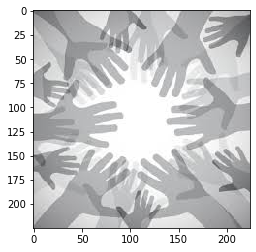

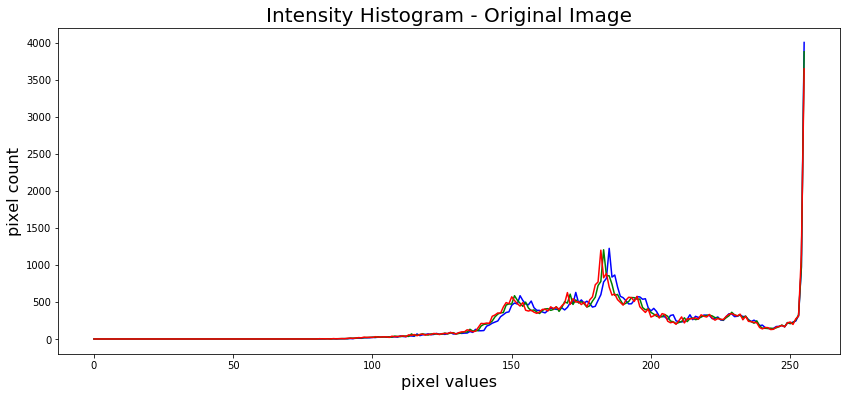

In [23]:
import cv2
image = "input/pic2"
ext = ".png"
img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

Encrypted Image

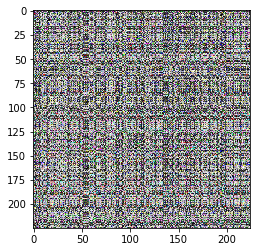

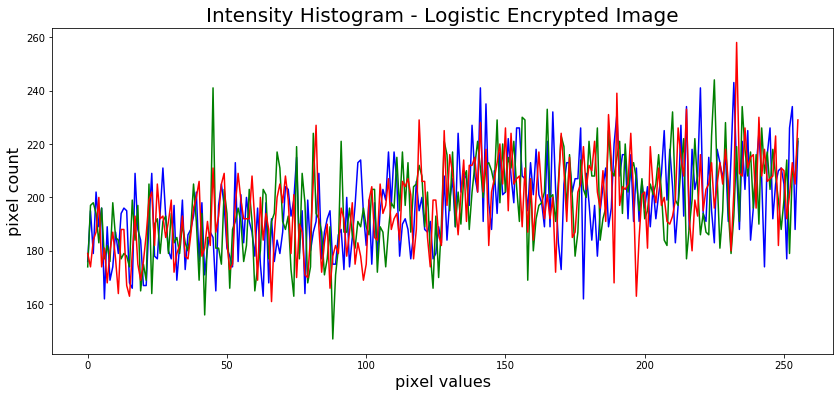

In [24]:
image = "encrypted_images/pic2"
ext = ".png"
img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram - Logistic Encrypted Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

### Correlation Coefficient

In [25]:
def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0]

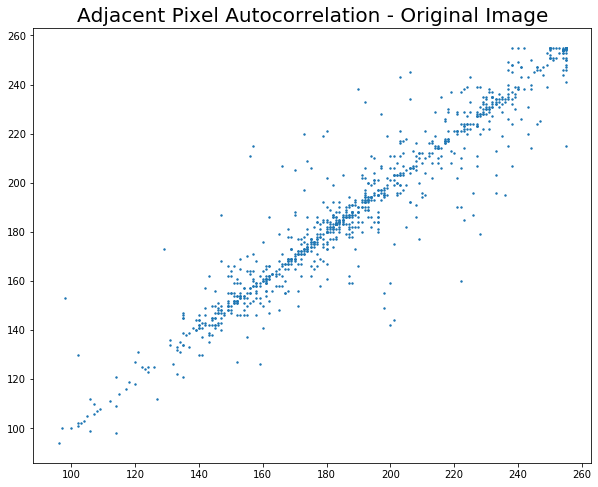

In [26]:
image = "input/pic2"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

In [27]:
from PIL import Image
from math import sqrt

value_of_x=0
value_of_y=0

#color_index_of_rgb 0-red,1-green,2-blue
def co1(color_index_of_rgb,height,width,pixels):
    value=0
    for pixel_coordinate_of_y in range(0, height):
        for pixel_coordinate_of_x in range(0, width):
            if pixel_coordinate_of_x+1==width:
                break
            value=pixels[pixel_coordinate_of_x,pixel_coordinate_of_y][color_index_of_rgb]*pixels[pixel_coordinate_of_x+1,pixel_coordinate_of_y][color_index_of_rgb]+value


    return value*height*width

def co2(color_index_of_rgb,height,width,pixels):
   global value_of_y
   global value_of_x
   for pixel_coordinate_of_y in range(0, height):
        for pixel_coordinate_of_x in range(0, width):
            if pixel_coordinate_of_x+1==width:
                break
            value_of_x=pixels[pixel_coordinate_of_x,pixel_coordinate_of_y][color_index_of_rgb]+value_of_x
            value_of_y=pixels[pixel_coordinate_of_x+1,pixel_coordinate_of_y][color_index_of_rgb]+value_of_y

   return value_of_x*value_of_y


def co3(color_index_of_rgb,height,width,pixels):
    value=0
    for pixel_coordinate_of_y in range(0, height):
        for pixel_coordinate_of_x in range(0, width):
            value=(pixels[pixel_coordinate_of_x,pixel_coordinate_of_y][color_index_of_rgb])**2 +value

    xy=(value*height*width)-(value_of_x**2)
    return  xy

def co4(color_index_of_rgb,height,width,pixels):
    value=0
    for pixel_coordinate_of_y in range(0, height):
        for pixel_coordinate_of_x in range(0, width):
            if pixel_coordinate_of_x+1==width:
                break
            value=(pixels[pixel_coordinate_of_x+1,pixel_coordinate_of_y][color_index_of_rgb]**2)+value

    xy=(value*height*width)-(value_of_y**2)
    return xy

def corr_of_rgb(loc):
    global value_of_y
    global value_of_x
    photo = Image.open(loc)
    # cryptotiger.bmp
    pixels = photo.load()
    width, height = photo.size
    value_of_y = 0
    value_of_x = 0
    r=((co1(0,height,width,pixels)-co2(0,height,width,pixels)) / sqrt(co3(0,height,width,pixels)*co4(0,height,width,pixels)))
    value_of_y=0
    value_of_x=0
    g=((co1(1,height,width,pixels) - co2(1,height,width,pixels)) / sqrt(co3(1,height,width,pixels) * co4(1,height,width,pixels)))
    value_of_x=0
    value_of_y=0
    b=((co1(2,height,width,pixels) - co2(2,height,width,pixels)) / sqrt(co3(2,height,width,pixels) * co4(2,height,width,pixels)))

    return ((r+g+b)/3)

In [28]:
corr_of_rgb("input/pic2.png")

0.9177842108032012

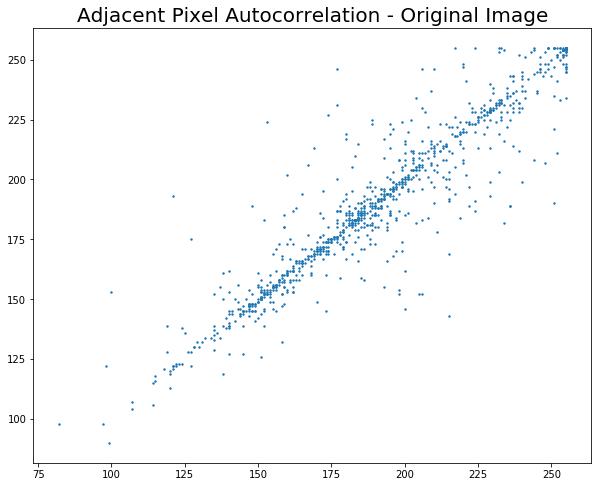

In [29]:
image = "input/pic2"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-1)
  y = random.randint(0,image_size-2)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x][y+1])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

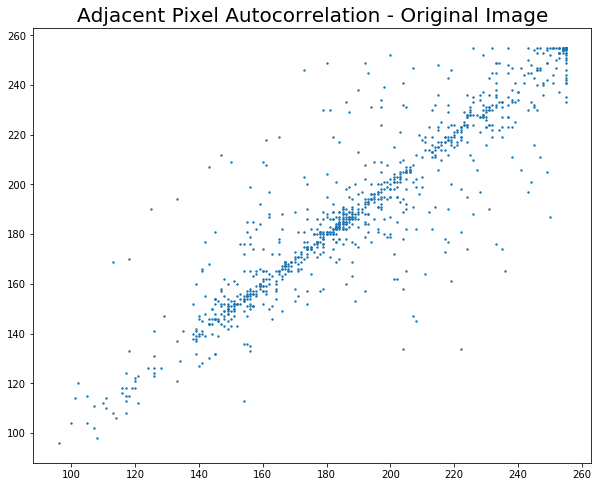

In [30]:
image = "input/pic2"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-2)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y+1])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

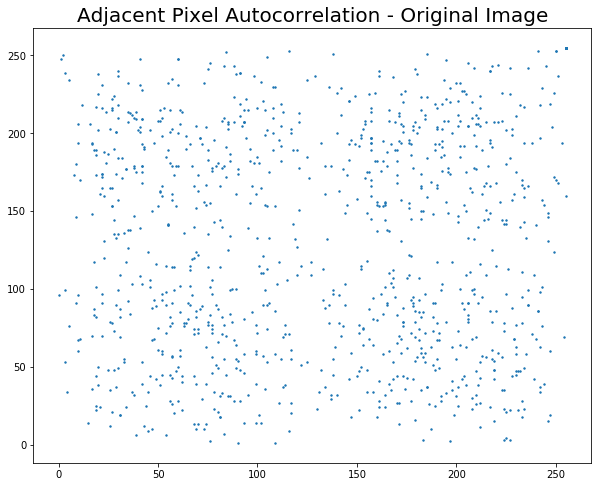

In [31]:
image = "encrypted_images/pic2"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

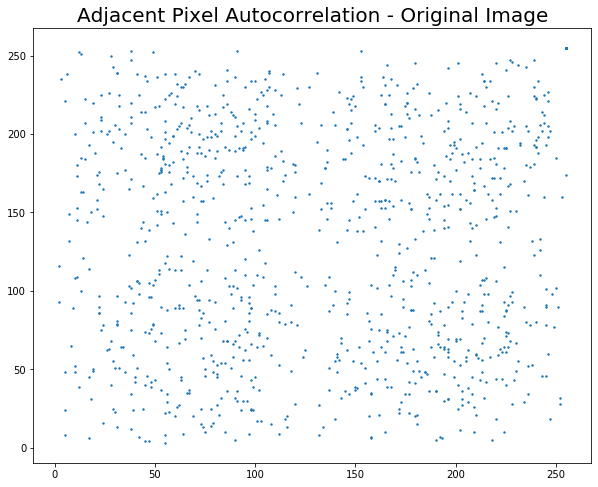

In [32]:
image = "encrypted_images/pic2"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-1)
  y = random.randint(0,image_size-2)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x][y+1])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

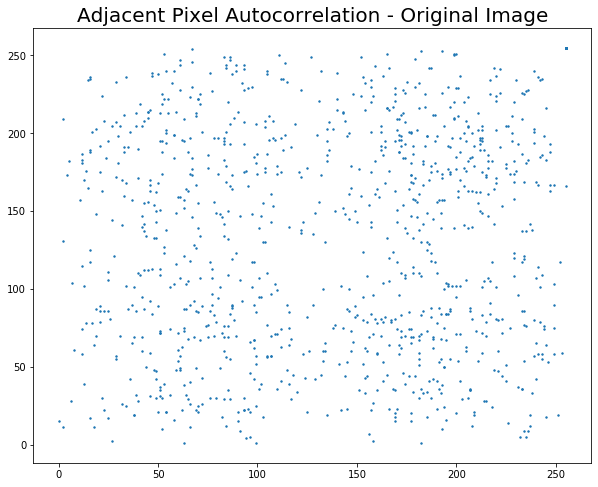

In [34]:
image = "encrypted_images/pic2"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-2)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y+1])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

# ENTROPHY ANALYSIS

In [35]:
from PIL import Image
img = Image.open('input/pic2.png').convert('L')
pic2_original = np.asarray(img.getdata()).reshape(img.size)


In [36]:

#python 3.7.4,opencv4.1
#   https://blog.csdn.net/caimouse/article/details/51749579
#
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from random import randint


 
 #Calculate information entropy
def entropy(labels, base=None):
    value,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()
    print(norm_counts)
    base = e if base is None else base
    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()#log(a) b=log (c) b÷log (c) a
#
h = entropy(pic2_original, 2)
print('h=',h)
             
#
cv2.waitKey(0)
cv2.destroyAllWindows()


[1.98412698e-05 1.98412698e-05 3.96825397e-05 5.95238095e-05
 1.98412698e-05 5.95238095e-05 5.95238095e-05 5.95238095e-05
 7.93650794e-05 7.93650794e-05 1.19047619e-04 7.93650794e-05
 2.18253968e-04 2.18253968e-04 1.78571429e-04 3.37301587e-04
 3.17460317e-04 3.37301587e-04 4.16666667e-04 3.96825397e-04
 4.76190476e-04 4.36507937e-04 5.95238095e-04 4.96031746e-04
 5.15873016e-04 5.55555556e-04 5.75396825e-04 4.96031746e-04
 7.73809524e-04 6.74603175e-04 6.15079365e-04 7.53968254e-04
 8.13492063e-04 6.54761905e-04 1.34920635e-03 9.12698413e-04
 1.05158730e-03 1.15079365e-03 1.36904762e-03 1.19047619e-03
 1.05158730e-03 1.34920635e-03 1.34920635e-03 1.34920635e-03
 1.23015873e-03 1.30952381e-03 1.56746032e-03 1.36904762e-03
 1.58730159e-03 1.68650794e-03 1.34920635e-03 1.52777778e-03
 1.60714286e-03 1.94444444e-03 1.82539683e-03 2.61904762e-03
 2.08333333e-03 2.14285714e-03 2.32142857e-03 3.49206349e-03
 3.86904762e-03 4.04761905e-03 4.16666667e-03 4.80158730e-03
 5.97222222e-03 6.666666

In [37]:
from PIL import Image
img = Image.open('encrypted_images/pic2.png').convert('L')
pic2_encrypted = np.asarray(img.getdata()).reshape(img.size)


In [45]:

#python 3.7.4,opencv4.1
#   https://blog.csdn.net/caimouse/article/details/51749579
#
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from random import randint


 
 #Calculate information entropy
def entropy(labels, base=None):
    value,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()
    print(norm_counts)
    base = e if base is None else base
    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()#log(a) b=log (c) b÷log (c) a
#
h = entropy(pic2_encrypted, 2)
print('h=',h)
             
#
cv2.waitKey(0)
cv2.destroyAllWindows()


[0.00037698 0.00055556 0.00117063 0.00097222 0.00103175 0.00180556
 0.00160714 0.00119048 0.00154762 0.00224206 0.00244048 0.00218254
 0.00238095 0.00257937 0.00259921 0.00220238 0.00212302 0.00281746
 0.00303571 0.00303571 0.00315476 0.00345238 0.00315476 0.00335317
 0.00303571 0.00388889 0.00367063 0.00371032 0.00319444 0.00375
 0.00365079 0.00329365 0.00333333 0.00378968 0.00426587 0.00438492
 0.00448413 0.00464286 0.00400794 0.00412698 0.00410714 0.00517857
 0.00478175 0.00456349 0.00464286 0.005      0.00505952 0.00436508
 0.00448413 0.00505952 0.00521825 0.00496032 0.00547619 0.00531746
 0.00549603 0.00490079 0.0047619  0.00521825 0.00535714 0.00541667
 0.00492063 0.00490079 0.0053373  0.00448413 0.00511905 0.00444444
 0.0053373  0.00486111 0.00509921 0.00535714 0.00509921 0.00446429
 0.00460317 0.0053373  0.00498016 0.00513889 0.00515873 0.00519841
 0.00468254 0.00470238 0.00474206 0.00501984 0.00509921 0.00402778
 0.00470238 0.00462302 0.00484127 0.00420635 0.0047619  0.0045833

# ANALYSIS AGAINST CROPPING ATTACK

Cropping image

In [43]:
from PIL import Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('input/pic4.png')
pix = im.load()

#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

# Vectors Kr and Kc
alpha = 8
Kr = [randint(0,pow(2,alpha)-1) for i in range(m)]
Kc = [randint(0,pow(2,alpha)-1) for i in range(n)]
ITER_MAX = 1

print('Vector Kr : ', Kr)
print('Vector Kc : ', Kc)

f = open('keys.txt','w+')
f.write('Vector Kr : \n')
for a in Kr:
	f.write(str(a) + '\n')
f.write('Vector Kc : \n')
for a in Kc:
	f.write(str(a) + '\n')
f.write('ITER_MAX : \n')
f.write(str(ITER_MAX) + '\n')


for iterations in range(ITER_MAX):
	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],Kr[i])
		else:
			r[i] = numpy.roll(r[i],-Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],Kr[i])
		else:
			g[i] = numpy.roll(g[i],-Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],Kr[i])
		else:
			b[i] = numpy.roll(b[i],-Kr[i])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			upshift(r,i,Kc[i])
		else:
			downshift(r,i,Kc[i])
		if(gModulus==0):
			upshift(g,i,Kc[i])
		else:
			downshift(g,i,Kc[i])
		if(bModulus==0):
			upshift(b,i,Kc[i])
		else:
			downshift(b,i,Kc[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])


for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

im.save('encrypted_images/pic4.png')





Vector Kr :  [167, 244, 166, 194, 8, 202, 127, 229, 32, 106, 155, 141, 251, 220, 30, 103, 166, 8, 74, 206, 254, 116, 31, 17, 28, 84, 5, 238, 179, 156, 114, 245, 22, 179, 69, 110, 70, 25, 76, 23, 215, 79, 147, 180, 62, 187, 126, 152, 172, 232, 202, 208, 255, 81, 175, 52, 215, 196, 46, 188, 221, 42, 144, 197, 76, 158, 232, 80, 126, 149, 242, 18, 53, 89, 153, 173, 25, 148, 206, 109, 181, 132, 115, 130, 96, 117, 108, 204, 173, 54, 160, 103, 239, 211, 27, 72, 42, 232, 29, 143, 81, 76, 191, 101, 137, 239, 18, 77, 37, 99, 89, 47, 39, 230, 100, 13, 3, 24, 75, 14, 228, 30, 40, 134, 149, 246, 137, 142, 216, 99, 58, 111, 194, 197, 105, 217, 227, 165, 165, 175, 71, 133, 246, 245, 193, 47, 173, 29, 81, 101, 160, 14, 255, 94, 83, 17, 82, 28, 80, 89, 236, 120, 123, 17, 158, 153, 235, 84, 9, 169, 67, 237, 142, 206, 168, 160, 51, 68, 161, 21, 84, 199, 171, 59, 17, 211, 179, 7, 120, 19, 231, 107, 6, 34, 60, 75, 121, 59, 29, 185, 39, 69, 144, 105, 60, 47, 49, 242, 133, 117, 184, 212, 220, 229, 155, 103, 

In [38]:
# Improting Image class from PIL module 
from PIL import Image 

# Opens a image in RGB mode 
im = Image.open("encrypted_images/pic2.png") 

# Size of the image in pixels (size of orginal image) 
# (This is not mandatory) 
width, height = im.size 

# Setting the points for cropped image 
left = width/4
top = height / 4
right = 3*width/4
bottom = 3 * height / 4

# Cropped image of above dimension 
# (It will not change orginal image) 
im1 = im.crop((left, top, right, bottom)) 

# Shows the image in image viewer 
im1.save("cropped_encrypted_images/pic2.png") 


Decrpyting cropped image

In [50]:
from PIL import  Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('cropped_encrypted_images/pic2.png')
pix = im.load()


#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

Kr = []
Kc = []

print('Enter value of Kr')

Kr = list(map(int, input().split(', ')))

print('Enter value of Kc')

Kc = list(map(int, input().split(',')))

print('Enter value of ITER_MAX')
ITER_MAX = int(input())


for iterations in range(ITER_MAX):
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			downshift(r,i,Kc[i])
		else:
			upshift(r,i,Kc[i])
		if(gModulus==0):
			downshift(g,i,Kc[i])
		else:
			upshift(g,i,Kc[i])
		if(bModulus==0):
			downshift(b,i,Kc[i])
		else:
			upshift(b,i,Kc[i])

	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],-Kr[i])
		else:
			r[i] = numpy.roll(r[i],Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],-Kr[i])
		else:
			g[i] = numpy.roll(g[i],Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],-Kr[i])
		else:
			b[i] = numpy.roll(b[i],Kr[i])

for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

im.save('decrypted_images/pic2_cropped_encrypted.png')





Enter value of Kr
174, 212, 243, 47, 231, 23, 250, 225, 182, 253, 160, 137, 254, 113, 129, 175, 232, 122, 162, 201, 127, 123, 235, 158, 27, 203, 72, 118, 90, 195, 221, 144, 23, 214, 107, 71, 15, 136, 253, 200, 87, 63, 12, 154, 32, 132, 180, 2, 121, 205, 45, 29, 172, 248, 168, 126, 243, 246, 157, 166, 71, 114, 14, 208, 74, 163, 21, 148, 24, 46, 196, 75, 44, 106, 53, 147, 237, 69, 13, 82, 188, 74, 105, 213, 114, 151, 75, 176, 89, 147, 250, 27, 163, 35, 37, 21, 13, 157, 76, 84, 234, 124, 33, 201, 121, 139, 140, 223, 37, 191, 243, 130, 59, 142, 175, 88, 225, 151, 152, 233, 112, 178, 87, 174, 14, 184, 175, 138, 77, 100, 201, 37, 171, 149, 174, 90, 0, 44, 159, 26, 207, 65, 251, 251, 113, 250, 0, 29, 95, 248, 172, 155, 244, 113, 51, 173, 231, 254, 56, 201, 227, 198, 111, 7, 249, 66, 40, 244, 75, 190, 60, 220, 71, 206, 27, 240, 248, 54, 131, 151, 58, 95, 24, 135, 136, 16, 48, 159, 58, 230, 30, 237, 14, 149, 165, 98, 177, 246, 52, 181, 210, 217, 1, 139, 21, 81, 125, 99, 192, 154, 16, 144, 178, 

crop image center

Encrypting pic1 here


In [64]:
from PIL import Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('input/pic1.png')
pix = im.load()

#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

# Vectors Kr and Kc
alpha = 8
Kr = [randint(0,pow(2,alpha)-1) for i in range(m)]
Kc = [randint(0,pow(2,alpha)-1) for i in range(n)]
ITER_MAX = 1

print('Vector Kr : ', Kr)
print('Vector Kc : ', Kc)

f = open('keys.txt','w+')
f.write('Vector Kr : \n')
for a in Kr:
	f.write(str(a) + '\n')
f.write('Vector Kc : \n')
for a in Kc:
	f.write(str(a) + '\n')
f.write('ITER_MAX : \n')
f.write(str(ITER_MAX) + '\n')


for iterations in range(ITER_MAX):
	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],Kr[i])
		else:
			r[i] = numpy.roll(r[i],-Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],Kr[i])
		else:
			g[i] = numpy.roll(g[i],-Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],Kr[i])
		else:
			b[i] = numpy.roll(b[i],-Kr[i])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			upshift(r,i,Kc[i])
		else:
			downshift(r,i,Kc[i])
		if(gModulus==0):
			upshift(g,i,Kc[i])
		else:
			downshift(g,i,Kc[i])
		if(bModulus==0):
			upshift(b,i,Kc[i])
		else:
			downshift(b,i,Kc[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])


for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

im.save('encrypted_images/pic1.png')





Vector Kr :  [38, 236, 4, 217, 58, 83, 43, 158, 122, 214, 102, 91, 68, 252, 53, 6, 82, 147, 166, 199, 33, 84, 3, 194, 241, 113, 64, 249, 96, 222, 254, 92, 105, 167, 166, 164, 222, 25, 83, 163, 7, 58, 171, 156, 165, 71, 46, 9, 17, 82, 186, 77, 166, 0, 82, 231, 118, 241, 46, 28, 156, 35, 164, 153, 176, 147, 173, 51, 107, 177, 105, 13, 30, 202, 51, 95, 129, 60, 37, 103, 245, 233, 105, 134, 203, 51, 74, 208, 56, 120, 160, 47, 253, 51, 209, 222, 232, 219, 36, 204, 211, 121, 130, 207, 201, 75, 106, 13, 247, 58, 7, 164, 233, 12, 44, 63, 25, 0, 86, 25, 109, 124, 94, 229, 88, 77, 182, 234, 137, 22, 167, 72, 73, 184, 85, 70, 213, 248, 177, 71, 90, 51, 5, 27, 232, 184, 253, 18, 51, 82, 11, 1, 134, 76, 198, 57, 154, 200, 72, 238, 209, 55, 235, 63, 121, 3, 153, 194, 189, 114, 92, 189, 113, 222, 185, 194, 17, 140, 233, 64, 172, 221, 117, 9, 29, 27, 6, 80, 20, 113, 219, 192, 95, 15, 21, 147, 179, 108, 119, 219, 133, 219, 118, 197, 142, 38, 182, 204, 102, 30, 41, 161, 68, 164, 210, 230, 27, 50, 242, 0

In [73]:
import cv2

def center_crop(img, dim):
	"""Returns center cropped image
	Args:
	img: image to be center cropped
	dim: dimensions (width, height) to be cropped
	"""
	width, height = img.shape[1], img.shape[0]

	# process crop width and height for max available dimension
	crop_width = dim[0] if dim[0]<img.shape[1] else img.shape[1]
	crop_height = dim[1] if dim[1]<img.shape[0] else img.shape[0] 
	mid_x, mid_y = int(width/2), int(height/2)
	cw2, ch2 = int(crop_width/2), int(crop_height/2) 
	crop_img = img[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]
	return crop_img



if __name__ == "__main__":
	image = cv2.imread('encrypted_images/pic1.png')

	ccrop_img = center_crop(image, (500,400))
	

	cv2.imwrite("cropped_encrypted_images/pic1_center_crop.png", ccrop_img)
	

In [74]:
from PIL import  Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('cropped_encrypted_images/pic1_center_crop.png')
pix = im.load()


#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

Kr = []
Kc = []

print('Enter value of Kr')

Kr = list(map(int, input().split(', ')))

print('Enter value of Kc')

Kc = list(map(int, input().split(',')))

print('Enter value of ITER_MAX')
ITER_MAX = int(input())


for iterations in range(ITER_MAX):
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			downshift(r,i,Kc[i])
		else:
			upshift(r,i,Kc[i])
		if(gModulus==0):
			downshift(g,i,Kc[i])
		else:
			upshift(g,i,Kc[i])
		if(bModulus==0):
			downshift(b,i,Kc[i])
		else:
			upshift(b,i,Kc[i])

	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],-Kr[i])
		else:
			r[i] = numpy.roll(r[i],Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],-Kr[i])
		else:
			g[i] = numpy.roll(g[i],Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],-Kr[i])
		else:
			b[i] = numpy.roll(b[i],Kr[i])

for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

im.save('decrypted_images/pic1_center_cropped.png')





Enter value of Kr
38, 236, 4, 217, 58, 83, 43, 158, 122, 214, 102, 91, 68, 252, 53, 6, 82, 147, 166, 199, 33, 84, 3, 194, 241, 113, 64, 249, 96, 222, 254, 92, 105, 167, 166, 164, 222, 25, 83, 163, 7, 58, 171, 156, 165, 71, 46, 9, 17, 82, 186, 77, 166, 0, 82, 231, 118, 241, 46, 28, 156, 35, 164, 153, 176, 147, 173, 51, 107, 177, 105, 13, 30, 202, 51, 95, 129, 60, 37, 103, 245, 233, 105, 134, 203, 51, 74, 208, 56, 120, 160, 47, 253, 51, 209, 222, 232, 219, 36, 204, 211, 121, 130, 207, 201, 75, 106, 13, 247, 58, 7, 164, 233, 12, 44, 63, 25, 0, 86, 25, 109, 124, 94, 229, 88, 77, 182, 234, 137, 22, 167, 72, 73, 184, 85, 70, 213, 248, 177, 71, 90, 51, 5, 27, 232, 184, 253, 18, 51, 82, 11, 1, 134, 76, 198, 57, 154, 200, 72, 238, 209, 55, 235, 63, 121, 3, 153, 194, 189, 114, 92, 189, 113, 222, 185, 194, 17, 140, 233, 64, 172, 221, 117, 9, 29, 27, 6, 80, 20, 113, 219, 192, 95, 15, 21, 147, 179, 108, 119, 219, 133, 219, 118, 197, 142, 38, 182, 204, 102, 30, 41, 161, 68, 164, 210, 230, 27, 50, 24

RMSE BETWEEN CENTER_CROPPED_DECRYPTED_IMAGE AND ORIGINAL IMAGE

In [75]:
"""
It calculates the difference between two images.This is just thee coding of a mathematical formula.
This function can called by passing two image object as parameters and then decimal value will be returned.
"""
from PIL import ImageChops,Image
import math, operator

def rootmeansquare(im1, im2):
    "Calculate the root-mean-square difference between two images"
    diff = ImageChops.difference(im1, im2)
    h = diff.histogram()
    sq = (value*(idx**2) for idx, value in enumerate(h))
    sum_of_squares = sum(sq)
    rms = math.sqrt(sum_of_squares/float(im1.size[0] * im1.size[1]))
    return rms

In [78]:
print(rootmeansquare("input/pic1.png", "decrypted_images/pic1_center_cropped.png"))

AttributeError: 'str' object has no attribute 'load'

# SPEED TEST

## Measure how long encryption takes

In [58]:
from PIL import Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('input/pic3.png')
pix = im.load()

import time
startTime= time.time()

#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

# Vectors Kr and Kc
alpha = 8
Kr = [randint(0,pow(2,alpha)-1) for i in range(m)]
Kc = [randint(0,pow(2,alpha)-1) for i in range(n)]
ITER_MAX = 1

print('Vector Kr : ', Kr)
print('Vector Kc : ', Kc)

f = open('keys.txt','w+')
f.write('Vector Kr : \n')
for a in Kr:
	f.write(str(a) + '\n')
f.write('Vector Kc : \n')
for a in Kc:
	f.write(str(a) + '\n')
f.write('ITER_MAX : \n')
f.write(str(ITER_MAX) + '\n')


for iterations in range(ITER_MAX):
	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],Kr[i])
		else:
			r[i] = numpy.roll(r[i],-Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],Kr[i])
		else:
			g[i] = numpy.roll(g[i],-Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],Kr[i])
		else:
			b[i] = numpy.roll(b[i],-Kr[i])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			upshift(r,i,Kc[i])
		else:
			downshift(r,i,Kc[i])
		if(gModulus==0):
			upshift(g,i,Kc[i])
		else:
			downshift(g,i,Kc[i])
		if(bModulus==0):
			upshift(b,i,Kc[i])
		else:
			downshift(b,i,Kc[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])


for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])
encrypted_time=round(time.time()-startTime,2)
print(encrypted_time)

im.save('encrypted_images/pic3.png')





Vector Kr :  [235, 198, 81, 176, 132, 124, 181, 122, 187, 164, 134, 78, 194, 48, 91, 202, 132, 165, 126, 37, 65, 80, 181, 27, 0, 173, 17, 42, 173, 120, 244, 54, 143, 165, 53, 74, 46, 52, 21, 78, 222, 78, 139, 182, 166, 146, 21, 130, 76, 7, 60, 82, 250, 34, 111, 80, 150, 48, 253, 106, 112, 110, 79, 150, 90, 168, 62, 96, 170, 253, 90, 62, 242, 212, 34, 249, 164, 243, 239, 0, 50, 39, 224, 172, 60, 115, 204, 115, 153, 233, 209, 115, 236, 73, 94, 139, 41, 94, 253, 68, 179, 113, 145, 52, 124, 8, 56, 95, 113, 83, 148, 124, 114, 113, 38, 208, 151, 136, 61, 86, 134, 235, 127, 149, 232, 111, 32, 206, 140, 27, 131, 77, 30, 90, 75, 25, 147, 181, 9, 109, 172, 56, 4, 63, 185, 41, 49, 32, 98, 95, 55, 131, 203, 96, 139, 150, 248, 3, 35, 21, 94, 219, 93, 93, 30, 214, 247, 115, 152, 121, 92, 254, 224, 221, 23, 112, 74, 160, 56, 210, 121, 147, 100, 200, 86, 244, 102, 30, 192, 3, 48, 82, 161, 201, 44, 100, 189, 176, 146, 211, 154, 14, 85, 37, 189, 82, 43, 112, 45, 33, 177, 158, 23, 53, 65, 75, 3, 132, 251

In [59]:
from PIL import  Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('encrypted_images/pic3.png')
pix = im.load()
import time
startTime= time.time()


#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

Kr = []
Kc = []

print('Enter value of Kr')

Kr = list(map(int, input().split(', ')))

print('Enter value of Kc')

Kc = list(map(int, input().split(',')))

print('Enter value of ITER_MAX')
ITER_MAX = int(input())


for iterations in range(ITER_MAX):
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			downshift(r,i,Kc[i])
		else:
			upshift(r,i,Kc[i])
		if(gModulus==0):
			downshift(g,i,Kc[i])
		else:
			upshift(g,i,Kc[i])
		if(bModulus==0):
			downshift(b,i,Kc[i])
		else:
			upshift(b,i,Kc[i])

	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],-Kr[i])
		else:
			r[i] = numpy.roll(r[i],Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],-Kr[i])
		else:
			g[i] = numpy.roll(g[i],Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],-Kr[i])
		else:
			b[i] = numpy.roll(b[i],Kr[i])

for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])
        
decrypted_time=round(time.time()-startTime,2)
print(decrypted_time)       

im.save('decrypted_images/pic3.png')





Enter value of Kr
235, 198, 81, 176, 132, 124, 181, 122, 187, 164, 134, 78, 194, 48, 91, 202, 132, 165, 126, 37, 65, 80, 181, 27, 0, 173, 17, 42, 173, 120, 244, 54, 143, 165, 53, 74, 46, 52, 21, 78, 222, 78, 139, 182, 166, 146, 21, 130, 76, 7, 60, 82, 250, 34, 111, 80, 150, 48, 253, 106, 112, 110, 79, 150, 90, 168, 62, 96, 170, 253, 90, 62, 242, 212, 34, 249, 164, 243, 239, 0, 50, 39, 224, 172, 60, 115, 204, 115, 153, 233, 209, 115, 236, 73, 94, 139, 41, 94, 253, 68, 179, 113, 145, 52, 124, 8, 56, 95, 113, 83, 148, 124, 114, 113, 38, 208, 151, 136, 61, 86, 134, 235, 127, 149, 232, 111, 32, 206, 140, 27, 131, 77, 30, 90, 75, 25, 147, 181, 9, 109, 172, 56, 4, 63, 185, 41, 49, 32, 98, 95, 55, 131, 203, 96, 139, 150, 248, 3, 35, 21, 94, 219, 93, 93, 30, 214, 247, 115, 152, 121, 92, 254, 224, 221, 23, 112, 74, 160, 56, 210, 121, 147, 100, 200, 86, 244, 102, 30, 192, 3, 48, 82, 161, 201, 44, 100, 189, 176, 146, 211, 154, 14, 85, 37, 189, 82, 43, 112, 45, 33, 177, 158, 23, 53, 65, 75, 3, 132,

# ANALYSIS BY ATTACK

### SALT AND PEPPER ATTACK


In [2]:
from PIL import  Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('less_salt_on_pic2encrypted.bmp')
pix = im.load()


#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

Kr = []
Kc = []

print('Enter value of Kr')

Kr = list(map(int, input().split(', ')))

print('Enter value of Kc')

Kc = list(map(int, input().split(',')))

print('Enter value of ITER_MAX')
ITER_MAX = int(input())


for iterations in range(ITER_MAX):
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			downshift(r,i,Kc[i])
		else:
			upshift(r,i,Kc[i])
		if(gModulus==0):
			downshift(g,i,Kc[i])
		else:
			upshift(g,i,Kc[i])
		if(bModulus==0):
			downshift(b,i,Kc[i])
		else:
			upshift(b,i,Kc[i])

	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],-Kr[i])
		else:
			r[i] = numpy.roll(r[i],Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],-Kr[i])
		else:
			g[i] = numpy.roll(g[i],Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],-Kr[i])
		else:
			b[i] = numpy.roll(b[i],Kr[i])

for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

im.save('less_salt_on_pic2encrypted_decrypted.bmp')





Enter value of Kr
4, 202, 149, 21, 234, 104, 139, 70, 51, 155, 5, 97, 16, 66, 197, 143, 162, 168, 62, 74, 125, 38, 162, 92, 50, 130, 118, 179, 87, 124, 28, 234, 0, 221, 7, 26, 163, 42, 156, 222, 13, 0, 252, 2, 114, 176, 128, 78, 187, 32, 60, 154, 239, 159, 235, 231, 161, 165, 116, 218, 186, 170, 100, 173, 233, 17, 95, 70, 11, 1, 160, 222, 192, 17, 235, 229, 93, 174, 102, 61, 91, 143, 42, 228, 0, 77, 129, 216, 169, 4, 98, 3, 135, 199, 39, 135, 101, 112, 144, 62, 136, 196, 62, 127, 178, 142, 169, 96, 36, 40, 178, 125, 131, 196, 171, 99, 43, 225, 200, 177, 85, 206, 188, 118, 35, 88, 205, 77, 72, 216, 122, 13, 13, 96, 163, 246, 153, 240, 179, 107, 190, 201, 200, 164, 173, 117, 100, 255, 190, 164, 133, 7, 250, 38, 120, 7, 172, 79, 207, 49, 194, 46, 239, 172, 128, 192, 131, 18, 206, 56, 9, 142, 219, 54, 77, 50, 176, 156, 140, 152, 59, 89, 139, 21, 25, 19, 174, 200, 95, 128, 137, 74, 105, 145, 195, 132, 136, 125, 151, 45, 98, 21, 4, 140, 116, 113, 213, 163, 74, 125, 80, 42, 97, 111, 233, 3, 1

In [3]:
from PIL import  Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('more_salt_on_pic2_encrypted.bmp')
pix = im.load()


#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

Kr = []
Kc = []

print('Enter value of Kr')

Kr = list(map(int, input().split(', ')))

print('Enter value of Kc')

Kc = list(map(int, input().split(',')))

print('Enter value of ITER_MAX')
ITER_MAX = int(input())


for iterations in range(ITER_MAX):
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			downshift(r,i,Kc[i])
		else:
			upshift(r,i,Kc[i])
		if(gModulus==0):
			downshift(g,i,Kc[i])
		else:
			upshift(g,i,Kc[i])
		if(bModulus==0):
			downshift(b,i,Kc[i])
		else:
			upshift(b,i,Kc[i])

	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],-Kr[i])
		else:
			r[i] = numpy.roll(r[i],Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],-Kr[i])
		else:
			g[i] = numpy.roll(g[i],Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],-Kr[i])
		else:
			b[i] = numpy.roll(b[i],Kr[i])

for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

im.save('more_salt_on_pic2_encrypted_decrypted.bmp')





Enter value of Kr
4, 202, 149, 21, 234, 104, 139, 70, 51, 155, 5, 97, 16, 66, 197, 143, 162, 168, 62, 74, 125, 38, 162, 92, 50, 130, 118, 179, 87, 124, 28, 234, 0, 221, 7, 26, 163, 42, 156, 222, 13, 0, 252, 2, 114, 176, 128, 78, 187, 32, 60, 154, 239, 159, 235, 231, 161, 165, 116, 218, 186, 170, 100, 173, 233, 17, 95, 70, 11, 1, 160, 222, 192, 17, 235, 229, 93, 174, 102, 61, 91, 143, 42, 228, 0, 77, 129, 216, 169, 4, 98, 3, 135, 199, 39, 135, 101, 112, 144, 62, 136, 196, 62, 127, 178, 142, 169, 96, 36, 40, 178, 125, 131, 196, 171, 99, 43, 225, 200, 177, 85, 206, 188, 118, 35, 88, 205, 77, 72, 216, 122, 13, 13, 96, 163, 246, 153, 240, 179, 107, 190, 201, 200, 164, 173, 117, 100, 255, 190, 164, 133, 7, 250, 38, 120, 7, 172, 79, 207, 49, 194, 46, 239, 172, 128, 192, 131, 18, 206, 56, 9, 142, 219, 54, 77, 50, 176, 156, 140, 152, 59, 89, 139, 21, 25, 19, 174, 200, 95, 128, 137, 74, 105, 145, 195, 132, 136, 125, 151, 45, 98, 21, 4, 140, 116, 113, 213, 163, 74, 125, 80, 42, 97, 111, 233, 3, 1

In [4]:
from PIL import  Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('less_speckle_noise_on_p2_encrypted.bmp')
pix = im.load()


#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

Kr = []
Kc = []

print('Enter value of Kr')

Kr = list(map(int, input().split(', ')))

print('Enter value of Kc')

Kc = list(map(int, input().split(',')))

print('Enter value of ITER_MAX')
ITER_MAX = int(input())


for iterations in range(ITER_MAX):
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			downshift(r,i,Kc[i])
		else:
			upshift(r,i,Kc[i])
		if(gModulus==0):
			downshift(g,i,Kc[i])
		else:
			upshift(g,i,Kc[i])
		if(bModulus==0):
			downshift(b,i,Kc[i])
		else:
			upshift(b,i,Kc[i])

	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],-Kr[i])
		else:
			r[i] = numpy.roll(r[i],Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],-Kr[i])
		else:
			g[i] = numpy.roll(g[i],Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],-Kr[i])
		else:
			b[i] = numpy.roll(b[i],Kr[i])

for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

im.save('less_speckle_noise_on_p2_encrypted_decrypted.bmp')





Enter value of Kr
4, 202, 149, 21, 234, 104, 139, 70, 51, 155, 5, 97, 16, 66, 197, 143, 162, 168, 62, 74, 125, 38, 162, 92, 50, 130, 118, 179, 87, 124, 28, 234, 0, 221, 7, 26, 163, 42, 156, 222, 13, 0, 252, 2, 114, 176, 128, 78, 187, 32, 60, 154, 239, 159, 235, 231, 161, 165, 116, 218, 186, 170, 100, 173, 233, 17, 95, 70, 11, 1, 160, 222, 192, 17, 235, 229, 93, 174, 102, 61, 91, 143, 42, 228, 0, 77, 129, 216, 169, 4, 98, 3, 135, 199, 39, 135, 101, 112, 144, 62, 136, 196, 62, 127, 178, 142, 169, 96, 36, 40, 178, 125, 131, 196, 171, 99, 43, 225, 200, 177, 85, 206, 188, 118, 35, 88, 205, 77, 72, 216, 122, 13, 13, 96, 163, 246, 153, 240, 179, 107, 190, 201, 200, 164, 173, 117, 100, 255, 190, 164, 133, 7, 250, 38, 120, 7, 172, 79, 207, 49, 194, 46, 239, 172, 128, 192, 131, 18, 206, 56, 9, 142, 219, 54, 77, 50, 176, 156, 140, 152, 59, 89, 139, 21, 25, 19, 174, 200, 95, 128, 137, 74, 105, 145, 195, 132, 136, 125, 151, 45, 98, 21, 4, 140, 116, 113, 213, 163, 74, 125, 80, 42, 97, 111, 233, 3, 1

In [5]:
from PIL import  Image
from random import randint
import numpy
import sys
from helper import *

im = Image.open('more_speckle_noise_on_p2_encrypted.bmp')
pix = im.load()


#Obtaining the RGB matrices
r = []
g = []
b = []
for i in range(im.size[0]):
	r.append([])
	g.append([])
	b.append([]) 
	for j in range(im.size[1]):
		rgbPerPixel = pix[i,j]
		r[i].append(rgbPerPixel[0])
		g[i].append(rgbPerPixel[1])
		b[i].append(rgbPerPixel[2])

m = im.size[0]
n = im.size[1]

Kr = []
Kc = []

print('Enter value of Kr')

Kr = list(map(int, input().split(', ')))

print('Enter value of Kc')

Kc = list(map(int, input().split(',')))

print('Enter value of ITER_MAX')
ITER_MAX = int(input())


for iterations in range(ITER_MAX):
	# For each column
	for j in range(n):
		for i in range(m):
			if(j%2==0):
				r[i][j] = r[i][j] ^ Kr[i]
				g[i][j] = g[i][j] ^ Kr[i]
				b[i][j] = b[i][j] ^ Kr[i]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kr[i])
				g[i][j] = g[i][j] ^ rotate180(Kr[i])
				b[i][j] = b[i][j] ^ rotate180(Kr[i])
	# For each row
	for i in range(m):
		for j in range(n):
			if(i%2==1):
				r[i][j] = r[i][j] ^ Kc[j]
				g[i][j] = g[i][j] ^ Kc[j]
				b[i][j] = b[i][j] ^ Kc[j]
			else:
				r[i][j] = r[i][j] ^ rotate180(Kc[j])
				g[i][j] = g[i][j] ^ rotate180(Kc[j])
				b[i][j] = b[i][j] ^ rotate180(Kc[j])
	# For each column
	for i in range(n):
		rTotalSum = 0
		gTotalSum = 0
		bTotalSum = 0
		for j in range(m):
			rTotalSum += r[j][i]
			gTotalSum += g[j][i]
			bTotalSum += b[j][i]
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			downshift(r,i,Kc[i])
		else:
			upshift(r,i,Kc[i])
		if(gModulus==0):
			downshift(g,i,Kc[i])
		else:
			upshift(g,i,Kc[i])
		if(bModulus==0):
			downshift(b,i,Kc[i])
		else:
			upshift(b,i,Kc[i])

	# For each row
	for i in range(m):
		rTotalSum = sum(r[i])
		gTotalSum = sum(g[i])
		bTotalSum = sum(b[i])
		rModulus = rTotalSum % 2
		gModulus = gTotalSum % 2
		bModulus = bTotalSum % 2
		if(rModulus==0):
			r[i] = numpy.roll(r[i],-Kr[i])
		else:
			r[i] = numpy.roll(r[i],Kr[i])
		if(gModulus==0):
			g[i] = numpy.roll(g[i],-Kr[i])
		else:
			g[i] = numpy.roll(g[i],Kr[i])
		if(bModulus==0):
			b[i] = numpy.roll(b[i],-Kr[i])
		else:
			b[i] = numpy.roll(b[i],Kr[i])

for i in range(m):
	for j in range(n):
		pix[i,j] = (r[i][j],g[i][j],b[i][j])

im.save('more_speckle_noise_on_p2_encrypted_decrypted.bmp')





Enter value of Kr
4, 202, 149, 21, 234, 104, 139, 70, 51, 155, 5, 97, 16, 66, 197, 143, 162, 168, 62, 74, 125, 38, 162, 92, 50, 130, 118, 179, 87, 124, 28, 234, 0, 221, 7, 26, 163, 42, 156, 222, 13, 0, 252, 2, 114, 176, 128, 78, 187, 32, 60, 154, 239, 159, 235, 231, 161, 165, 116, 218, 186, 170, 100, 173, 233, 17, 95, 70, 11, 1, 160, 222, 192, 17, 235, 229, 93, 174, 102, 61, 91, 143, 42, 228, 0, 77, 129, 216, 169, 4, 98, 3, 135, 199, 39, 135, 101, 112, 144, 62, 136, 196, 62, 127, 178, 142, 169, 96, 36, 40, 178, 125, 131, 196, 171, 99, 43, 225, 200, 177, 85, 206, 188, 118, 35, 88, 205, 77, 72, 216, 122, 13, 13, 96, 163, 246, 153, 240, 179, 107, 190, 201, 200, 164, 173, 117, 100, 255, 190, 164, 133, 7, 250, 38, 120, 7, 172, 79, 207, 49, 194, 46, 239, 172, 128, 192, 131, 18, 206, 56, 9, 142, 219, 54, 77, 50, 176, 156, 140, 152, 59, 89, 139, 21, 25, 19, 174, 200, 95, 128, 137, 74, 105, 145, 195, 132, 136, 125, 151, 45, 98, 21, 4, 140, 116, 113, 213, 163, 74, 125, 80, 42, 97, 111, 233, 3, 1

### : MSE between original images and the decrypted versions under different noise attacks.